<a href="https://colab.research.google.com/github/theostoican/MastersThesis/blob/main/experiments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

# Helper for plotting the trajectories of the weights of the neurons

In [47]:
def plot_trajectories(data_row):
  convergence_neurons_incoming_x = []
  convergence_neurons_incoming_y = []
  convergence_neurons_outgoing = []
  for i in range(0, int(data_row['student size'])):
    
    neuron_traj_x = np.fromstring(data_row['neuron_' + str(i) + '_traj_x'].values[0][1:-1], dtype=float, sep=',')
    neuron_traj_y = np.fromstring(data_row['neuron_' + str(i) + '_traj_y'].values[0][1:-1], dtype=float, sep=',')
    plt.plot(neuron_traj_x, neuron_traj_y)
  
    convergence_neurons_incoming_x.append(neuron_traj_x[-1])
    convergence_neurons_incoming_y.append(neuron_traj_y[-1])

    neuron_a = float(data_row['neuron_' + str(i) + '_a'].values[0])
    convergence_neurons_outgoing.append(neuron_a)

  teacher_neurons_x = np.fromstring(data_row['teacher_neurons_x'].values[0][1 : -1], dtype=float, sep=',')
  teacher_neurons_y = np.fromstring(data_row['teacher_neurons_y'].values[0][1 : -1], dtype=float, sep=',')
  plt.scatter(teacher_neurons_x, teacher_neurons_y, marker="*")

  plt.scatter(convergence_neurons_incoming_x,
            convergence_neurons_incoming_y,
            c = convergence_neurons_outgoing,
            cmap=matplotlib.cm.jet)
  plt.colorbar()

# Read the data from the .csv file

In [48]:
data = pd.read_csv('experiments_data.csv')

# TODO: remove these check and make sure the Hessian is not complex/
data['smallest eigenvalue'] = pd.to_numeric(data['smallest eigenvalue'], 'coerce')
print("Number of complex eigenvalues:", len(data[data['smallest eigenvalue'].isna()]))
data = data[data['smallest eigenvalue'].notna()]
data['loss'] = pd.to_numeric(data['loss'], 'coerce')
data = data[data['loss'].notna()]
data['gradient norm'] = pd.to_numeric(data['gradient norm'], 'coerce')
data = data[data['gradient norm'].notna()]

len(data)

Number of complex eigenvalues: 0


1000

In [49]:
data.head()

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
0,4.035903e-07,0.000008,5.227504e-06,5,"[-0.046242177, -0.04514225, -0.04414264, -0.04...","[0.7327796, 0.73167956, 0.73068, 0.72968084, 0...",-0.698603,"[-0.22724533, -0.22614531, -0.2251453, -0.2241...","[0.69640636, 0.69530636, 0.6943068, 0.6933079,...",0.678112,"[0.67752504, 0.67862487, 0.67962354, 0.6806204...","[0.44552362, 0.44442385, 0.44342485, 0.4424271...",0.915504,"[0.91166425, 0.9127636, 0.9137596, 0.9147499, ...","[-0.63979816, -0.6386983, -0.6376991, -0.63670...",-1.793024,"[0.7219721, 0.7208713, 0.71986747, 0.71885866,...","[-0.5775293, -0.5764296, -0.5754314, -0.574435...",0.898015,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
1,2.225903e-07,0.000004,4.221191e-06,5,"[0.8027848, 0.8016847, 0.8006851, 0.7996859, 0...","[0.017024696, 0.018124605, 0.019124098, 0.0201...",-0.740489,"[0.5280745, 0.5291747, 0.53017485, 0.5311755, ...","[0.020610452, 0.019510236, 0.018509084, 0.0175...",0.966294,"[0.44325614, 0.444356, 0.4453554, 0.4463539, 0...","[0.601933, 0.6008328, 0.5998328, 0.5988332, 0....",0.975531,"[-0.07272923, -0.07382897, -0.0748276, -0.0758...","[-0.19345278, -0.1923529, -0.1913537, -0.19035...",-0.473171,"[0.28916848, 0.28806877, 0.28707013, 0.2860734...","[-0.85432434, -0.85322416, -0.852224, -0.85122...",-0.728164,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
2,8.132484e-05,0.000002,1.817883e-06,5,"[0.10148275, 0.102582574, 0.10358161, 0.104579...","[-0.1685515, -0.16745196, -0.16645466, -0.1654...",1.133101,"[0.12886608, 0.12776643, 0.1267684, 0.12577306...","[0.84672844, 0.84782785, 0.8488243, 0.84981585...",-0.643888,"[-0.13422704, -0.13532679, -0.13632539, -0.137...","[-0.8085872, -0.807487, -0.80648685, -0.805486...",-0.595316,"[0.7908728, 0.7897731, 0.78877485, 0.78777885,...","[0.08526015, 0.08636029, 0.087361015, 0.088362...",-0.605042,"[0.17771435, 0.17881426, 0.17981374, 0.1808125...","[0.20972574, 0.20862569, 0.2076254, 0.20662476...",0.711148,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
3,2.334152e-07,0.000002,5.948918e-06,5,"[0.23703432, 0.23813398, 0.2391321, 0.24012765...","[0.41523325, 0.41413355, 0.4131351, 0.4121388,...",-0.713120,"[0.77080727, 0.7719069, 0.7729048, 0.77389985,...","[-0.20185685, -0.20075722, -0.1997593, -0.1987...",0.300356,"[-0.6106811, -0.60958093, -0.60858136, -0.6075...","[-0.061038554, -0.0599373, -0.058930594, -0.05...",0.679448,"[-0.12511659, -0.12621675, -0.12721764, -0.128...","[0.32875967, 0.32765925, 0.32665697, 0.3256515...",-0.970284,"[-0.8710019, -0.8699017, -0.86890167, -0.86790...","[-0.14738059, -0.14848201, -0.14948963, -0.150...",0.703601,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
4,3.876069e-08,0.000001,-1.555148e-07,5,"[0.48865175, 0.48755255, 0.48655668, 0.4855665...","[-0.26613104, -0.2672305, -0.26822785, -0.2692...",0.823882,"[0.84879935, 0.84770006, 0.8467042, 0.84571403...","[-0.8020609, -0.80316025, -0.80415624, -0.8051...",-0.827794,"[0.006595254, 0.0054971585, 0.0045077, 0.00353...","[0.5405443, 0.53944457, 0.5384463, 0.5374504, ...",0.321607,"[-0.49246982, -0.4935688, -0.49456364, -0.4955...","[0.46640015, 0.46530083, 0.4643044, 0.4633129,...",-1.007704,"[0.5362009, 0.53730196, 0.5383075, 0.5393204, ...","[0.18987966, 0.18878011, 0.18778266, 0.1867887...",0.690009,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


# Case 1: positive eigenvalues

This is certainly:
- either a local minimum
- or a global minimum

In [50]:
positive_eigenvalues_data = data[data['smallest eigenvalue'] >= 0]
positive_eigenvalues_data.head()

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
0,4.035903e-07,0.000008,0.000005,5,"[-0.046242177, -0.04514225, -0.04414264, -0.04...","[0.7327796, 0.73167956, 0.73068, 0.72968084, 0...",-0.698603,"[-0.22724533, -0.22614531, -0.2251453, -0.2241...","[0.69640636, 0.69530636, 0.6943068, 0.6933079,...",0.678112,"[0.67752504, 0.67862487, 0.67962354, 0.6806204...","[0.44552362, 0.44442385, 0.44342485, 0.4424271...",0.915504,"[0.91166425, 0.9127636, 0.9137596, 0.9147499, ...","[-0.63979816, -0.6386983, -0.6376991, -0.63670...",-1.793024,"[0.7219721, 0.7208713, 0.71986747, 0.71885866,...","[-0.5775293, -0.5764296, -0.5754314, -0.574435...",0.898015,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
1,2.225903e-07,0.000004,0.000004,5,"[0.8027848, 0.8016847, 0.8006851, 0.7996859, 0...","[0.017024696, 0.018124605, 0.019124098, 0.0201...",-0.740489,"[0.5280745, 0.5291747, 0.53017485, 0.5311755, ...","[0.020610452, 0.019510236, 0.018509084, 0.0175...",0.966294,"[0.44325614, 0.444356, 0.4453554, 0.4463539, 0...","[0.601933, 0.6008328, 0.5998328, 0.5988332, 0....",0.975531,"[-0.07272923, -0.07382897, -0.0748276, -0.0758...","[-0.19345278, -0.1923529, -0.1913537, -0.19035...",-0.473171,"[0.28916848, 0.28806877, 0.28707013, 0.2860734...","[-0.85432434, -0.85322416, -0.852224, -0.85122...",-0.728164,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
2,8.132484e-05,0.000002,0.000002,5,"[0.10148275, 0.102582574, 0.10358161, 0.104579...","[-0.1685515, -0.16745196, -0.16645466, -0.1654...",1.133101,"[0.12886608, 0.12776643, 0.1267684, 0.12577306...","[0.84672844, 0.84782785, 0.8488243, 0.84981585...",-0.643888,"[-0.13422704, -0.13532679, -0.13632539, -0.137...","[-0.8085872, -0.807487, -0.80648685, -0.805486...",-0.595316,"[0.7908728, 0.7897731, 0.78877485, 0.78777885,...","[0.08526015, 0.08636029, 0.087361015, 0.088362...",-0.605042,"[0.17771435, 0.17881426, 0.17981374, 0.1808125...","[0.20972574, 0.20862569, 0.2076254, 0.20662476...",0.711148,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
3,2.334152e-07,0.000002,0.000006,5,"[0.23703432, 0.23813398, 0.2391321, 0.24012765...","[0.41523325, 0.41413355, 0.4131351, 0.4121388,...",-0.713120,"[0.77080727, 0.7719069, 0.7729048, 0.77389985,...","[-0.20185685, -0.20075722, -0.1997593, -0.1987...",0.300356,"[-0.6106811, -0.60958093, -0.60858136, -0.6075...","[-0.061038554, -0.0599373, -0.058930594, -0.05...",0.679448,"[-0.12511659, -0.12621675, -0.12721764, -0.128...","[0.32875967, 0.32765925, 0.32665697, 0.3256515...",-0.970284,"[-0.8710019, -0.8699017, -0.86890167, -0.86790...","[-0.14738059, -0.14848201, -0.14948963, -0.150...",0.703601,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
7,4.874682e-08,0.000001,0.000002,5,"[-0.5437338, -0.54263437, -0.54163784, -0.5406...","[0.6561147, 0.65721405, 0.6582101, 0.65920085,...",-0.998893,"[0.012048781, 0.013148672, 0.0141480835, 0.015...","[-0.74958426, -0.74848396, -0.7474825, -0.7464...",1.057702,"[0.636695, 0.63559514, 0.63459605, 0.63359827,...","[-0.8932655, -0.8943653, -0.8953639, -0.896360...",-0.060089,"[-0.8572242, -0.8561242, -0.8551247, -0.854126...","[0.62270796, 0.6238079, 0.6248072, 0.6258055, ...",0.854142,"[0.42886353, 0.42776376, 0.4267648, 0.42576718...","[0.8262416, 0.8273413, 0.8283396, 0.8293356, 0...",-0.852862,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


## Choose the entry with the highest loss for visual inspection.

In [51]:
highest_loss_row = positive_eigenvalues_data[positive_eigenvalues_data['loss'] == 
                          max(positive_eigenvalues_data['loss'])]
highest_loss_row

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
653,0.00012,0.000002,1.784694e-07,5,"[-0.17695445, -0.17585504, -0.17485832, -0.173...","[0.6792538, 0.68035316, 0.68134916, 0.6823395,...",0.509838,"[0.41802037, 0.41692105, 0.4159244, 0.41493243...","[0.029575884, 0.028476346, 0.02747908, 0.02648...",0.170027,"[-0.21132964, -0.21022974, -0.20923033, -0.208...","[-0.24188131, -0.24078102, -0.23977979, -0.238...",0.440109,"[0.049410224, 0.048310187, 0.047310237, 0.0463...","[0.69966745, 0.6985669, 0.69756466, 0.69656044...",-1.219778,"[-0.59131, -0.5902101, -0.58921075, -0.5882124...","[-0.09523976, -0.094139695, -0.09313959, -0.09...",0.100087,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


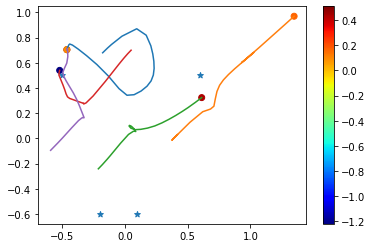

In [52]:
plot_trajectories(highest_loss_row)

## Choose the entry with the lowest loss for visual inspection.

In [53]:
lowest_loss_row = positive_eigenvalues_data[positive_eigenvalues_data['loss'] == 
                          min(positive_eigenvalues_data['loss'])]
lowest_loss_row

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
102,1.881517e-10,8.106679e-07,8.059993e-09,5,"[-0.7732738, -0.774374, -0.7753746, -0.776376,...","[-0.78105235, -0.7799524, -0.77895314, -0.7779...",-0.998583,"[-0.57305205, -0.5719545, -0.5709681, -0.57000...","[-0.07717246, -0.076072894, -0.07507526, -0.07...",0.998827,"[-0.2917931, -0.29289243, -0.2938889, -0.29488...","[0.779953, 0.778853, 0.7778535, 0.77685475, 0....",0.998895,"[-0.68452746, -0.6834279, -0.68243027, -0.6814...","[0.21667409, 0.21777387, 0.21877272, 0.2197699...",-0.516602,"[-0.30381483, -0.30271617, -0.30172342, -0.300...","[-0.012985706, -0.011885881, -0.010886826, -0....",-0.482536,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


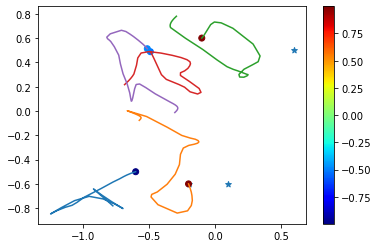

In [54]:
plot_trajectories(lowest_loss_row)

# Case 2: negative eigenvalues

In [55]:
negative_eigenvalues_data = data[data['smallest eigenvalue'] <= 0]
negative_eigenvalues_data.head()

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
4,3.876069e-08,1.379654e-06,-1.555148e-07,5,"[0.48865175, 0.48755255, 0.48655668, 0.4855665...","[-0.26613104, -0.2672305, -0.26822785, -0.2692...",0.823882,"[0.84879935, 0.84770006, 0.8467042, 0.84571403...","[-0.8020609, -0.80316025, -0.80415624, -0.8051...",-0.827794,"[0.006595254, 0.0054971585, 0.0045077, 0.00353...","[0.5405443, 0.53944457, 0.5384463, 0.5374504, ...",0.321607,"[-0.49246982, -0.4935688, -0.49456364, -0.4955...","[0.46640015, 0.46530083, 0.4643044, 0.4633129,...",-1.007704,"[0.5362009, 0.53730196, 0.5383075, 0.5393204, ...","[0.18987966, 0.18878011, 0.18778266, 0.1867887...",0.690009,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
5,4.785881e-05,1.833107e-06,-3.001067e-08,5,"[0.3234204, 0.32451984, 0.3255168, 0.32650948,...","[0.2352531, 0.23635142, 0.23734224, 0.23832035...",0.237902,"[-0.5704462, -0.57154584, -0.57254356, -0.5735...","[-0.25315118, -0.25425017, -0.2552449, -0.2562...",-1.442471,"[0.64300764, 0.64410704, 0.64510363, 0.6460956...","[-0.63188875, -0.6307894, -0.6297934, -0.62880...",0.315267,"[-0.45882022, -0.45772058, -0.45672247, -0.455...","[-0.6607688, -0.6618685, -0.6628668, -0.663862...",0.814626,"[-0.09339368, -0.09229412, -0.0912965, -0.0903...","[0.8207871, 0.82188594, 0.82287955, 0.8238644,...",0.075087,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
6,2.607065e-07,1.703479e-06,-3.383000e-07,5,"[0.7445003, 0.7434001, 0.7424005, 0.7414011, 0...","[-0.17361951, -0.17251946, -0.17151919, -0.170...",0.103624,"[-0.083565116, -0.0846649, -0.08566375, -0.086...","[-0.0005546808, 0.00054502493, 0.001543425, 0....",-0.961365,"[-0.81236094, -0.81126076, -0.8102612, -0.8092...","[0.060183227, 0.059083287, 0.058083594, 0.0570...",0.674783,"[0.903631, 0.9025309, 0.90153134, 0.90053225, ...","[-0.8357147, -0.83681476, -0.83781433, -0.8388...",-0.695242,"[0.70260537, 0.70150703, 0.7005158, 0.6995372,...","[-0.22981805, -0.22871932, -0.22772638, -0.226...",0.878201,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
13,1.050519e-04,6.356665e-07,-6.929183e-08,5,"[0.41194582, 0.41304564, 0.41404498, 0.4150433...","[-0.6357314, -0.6346312, -0.6336314, -0.632631...",0.363866,"[0.34327078, 0.34437013, 0.34536684, 0.3463590...","[0.35142732, 0.35252708, 0.3535261, 0.35452372...",0.931002,"[-0.43604335, -0.4349477, -0.43397206, -0.4330...","[0.08913779, 0.09023348, 0.09120901, 0.0921477...",-0.243696,"[0.45507383, 0.45397404, 0.45297492, 0.451977,...","[0.6045326, 0.6034324, 0.6024314, 0.601429, 0....",-0.534998,"[0.038893998, 0.037793558, 0.03679119, 0.03578...","[0.46357214, 0.46247157, 0.4614685, 0.46046126...",-0.516183,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"
19,8.372992e-05,7.048433e-07,-7.688774e-07,5,"[0.47274482, 0.4738441, 0.47484034, 0.47583133...","[-0.43501064, -0.4339109, -0.43291217, -0.4319...",0.221436,"[0.16548061, 0.16437995, 0.16337644, 0.1623681...","[-0.65533936, -0.6542395, -0.65324044, -0.6522...",0.267429,"[-0.2949465, -0.29384628, -0.29284504, -0.2918...","[-0.21771783, -0.21881784, -0.2198178, -0.2208...",-0.519470,"[0.43591177, 0.4370111, 0.43800774, 0.4389997,...","[-0.5181545, -0.5170547, -0.51605576, -0.51505...",0.732719,"[-0.49455607, -0.49345586, -0.4924545, -0.4914...","[-0.85519725, -0.85629743, -0.85729814, -0.858...",-0.702110,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


## Choose an experiment with the (negative) eigenvalue with the highest magnitude - indicative of a saddle.

In [56]:
smallest_neg_eigenvalue_row = negative_eigenvalues_data[negative_eigenvalues_data['smallest eigenvalue'] == 
                          min(negative_eigenvalues_data['smallest eigenvalue'])]
smallest_neg_eigenvalue_row

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
125,0.000117,0.000002,-0.000051,5,"[-0.35456252, -0.3534622, -0.3524605, -0.35145...","[0.5887488, 0.5876485, 0.586647, 0.58564335, 0...",0.430106,"[0.77525306, 0.7763528, 0.77735126, 0.77834755...","[-0.3294224, -0.33052227, -0.3315219, -0.33252...",0.337457,"[0.18831623, 0.18721625, 0.18621647, 0.1852170...","[-0.40779024, -0.4066904, -0.4056907, -0.40469...",-0.677402,"[-0.3207001, -0.32179976, -0.3227979, -0.32379...","[-0.2780038, -0.27690417, -0.27590588, -0.2749...",0.014626,"[-0.24833125, -0.24943091, -0.2504291, -0.2514...","[-0.0042284727, -0.0031287882, -0.002130498, -...",-0.104789,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


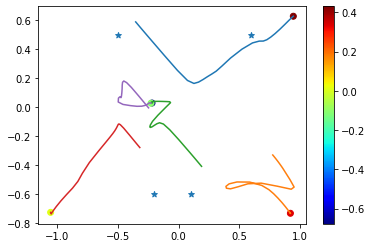

In [57]:
plot_trajectories(smallest_neg_eigenvalue_row)

## Choose an experiment with the (negative) eigenvalue with the smallest magnitude - indicative of a local/global minimum.

In [58]:
highest_neg_eigenvalue_row = negative_eigenvalues_data[negative_eigenvalues_data['smallest eigenvalue'] == 
                          max(negative_eigenvalues_data['smallest eigenvalue'])]
highest_neg_eigenvalue_row

,loss,gradient norm,smallest eigenvalue,student size,neuron_0_traj_x,neuron_0_traj_y,neuron_0_a,neuron_1_traj_x,neuron_1_traj_y,neuron_1_a,neuron_2_traj_x,neuron_2_traj_y,neuron_2_a,neuron_3_traj_x,neuron_3_traj_y,neuron_3_a,neuron_4_traj_x,neuron_4_traj_y,neuron_4_a,teacher_neurons_x,teacher_neurons_y
33,0.000103,9.129103e-07,-1.718423e-10,5,"[0.27218878, 0.27329805, 0.2743437, 0.27543986...","[0.40178573, 0.40067688, 0.39963362, 0.3985419...",0.43923,"[0.7726761, 0.771577, 0.7705818, 0.76959157, 0...","[-0.41308856, -0.4141873, -0.41518077, -0.4161...",0.824742,"[-0.09499341, -0.09397683, -0.09360138, -0.093...","[0.15751624, 0.15861538, 0.15961063, 0.1605993...",-0.498917,"[-0.21688455, -0.21798493, -0.21898627, -0.219...","[-0.90970266, -0.90860295, -0.9076047, -0.9066...",-0.478185,"[-0.36533946, -0.36424083, -0.36324757, -0.362...","[0.29680467, 0.2979036, 0.29889768, 0.2998842,...",-0.286891,"[0.6, -0.5, -0.2, 0.1]","[0.5, 0.5, -0.6, -0.6]"


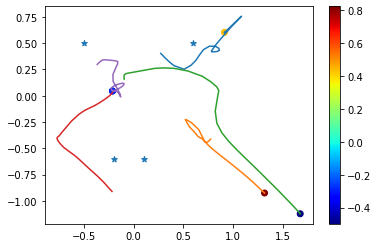

In [59]:
plot_trajectories(highest_neg_eigenvalue_row)

# How many are global minima?

In [60]:
len(data[data['loss'] <= 1e-7])

239